In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from lxml import etree
import urllib.request
import zipfile
from nltk.tokenize import word_tokenize,sent_tokenize

## 데이터 로드

In [ ]:
urllib.request.urlretrieve("https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip", filename="ted_en-20160408.zip")
# 데이터 다운로드

with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
  target_text = etree.parse(z.open('ted_en-20160408.xml', 'r'))
  parse_text = '\n'.join(target_text.xpath('//content/text()'))
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.

In [ ]:
parse_text[500:1000]

'nd what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.\nTo me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.\n(Laughter)\nFacit did too much exploitation. But exploration can go wild, too.\nA few years back, I worked closely alongside a European '

## 데이터 전처리

In [ ]:
test_sentence = 'I like Apple !!!'
test_sentence=re.sub(r"[^a-z0-9]+", " ", test_sentence.lower())

In [ ]:
test_sentence

'i like apple '

In [ ]:
test_tokenize=word_tokenize(test_sentence)
test_tokenize

['i', 'like', 'apple']

In [ ]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해 문장 토큰화 수행
sent_text=

normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해  단어 토큰화 수행
result = []

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
for line in result[:3]: 
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Glove 훈련

In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 4.2MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700258 sha256=d323823b303e38021aebb4eaf351f7a81454ed1d1a4dc38b3e21dfc173d4613b
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from glove import Corpus, Glove

#동시 등장 행렬 생성 (window size :5 )


In [ ]:
corpus.matrix.shape

(54775, 54775)

In [ ]:
#Glove 객체 생성 , 단어 갯수 : 100 , 학습률 : 0.05

# 학습에 이용할 쓰레드의 개수 : 4 에포크 : 20

glove.add_dictionary(corpus.dictionary)

In [ ]:
#man 과 유사한 단어 출력
print(model_result1)

[('woman', 0.9626677227490001), ('guy', 0.8744790385074679), ('girl', 0.8596878089446649), ('kid', 0.8361110295987678)]


In [ ]:
#boy 과 유사한 단어 출력
print(model_result2)

[('girl', 0.9475067404401961), ('woman', 0.8675138852459751), ('kid', 0.8288362268314604), ('man', 0.8248769607109564)]


In [ ]:
#university 과 유사한 단어 출력
print(model_result3)

[('harvard', 0.8831329094778395), ('mit', 0.8421332654480119), ('stanford', 0.8309541749607696), ('cambridge', 0.8236387142387749)]


In [ ]:
#water 과 유사한 단어 출력
print(model_result4)

[('fresh', 0.8313303414713319), ('clean', 0.8266739491330581), ('air', 0.8252338774104252), ('electricity', 0.8185057614595482)]


In [ ]:
#physics 과 유사한 단어 출력
print(model_result5)

[('chemistry', 0.9023262172072285), ('mathematics', 0.8997196777422144), ('beauty', 0.8915660630778522), ('economics', 0.8824521948930866)]


# 사전 훈련된 워드 임베딩

## keras Embedding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [ ]:
#Tokenizer 객체 생성

#Tokenizer 객체 문장에 fitting


In [ ]:
vocab_size = len(t.word_index) + 1

print(vocab_size)

In [ ]:
#문장을 시퀀스로 변환

print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len=max(len(l) for l in X_encoded)
print(max_len)

4


In [ ]:
#문장 최대길이에 맞춰 패딩
X_train=
y_train=np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


임베딩 층 입력 : Embedding(vocab_size, output_dim, input_length)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
#임베딩층
#Flatten층
#Dense층

In [ ]:
#model compile : optimizer - adam , metric - accuracy
history=model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.5040 - acc: 1.0000
Epoch 2/100
1/1 - 0s - loss: 0.5020 - acc: 1.0000
Epoch 3/100
1/1 - 0s - loss: 0.5000 - acc: 1.0000
Epoch 4/100
1/1 - 0s - loss: 0.4980 - acc: 1.0000
Epoch 5/100
1/1 - 0s - loss: 0.4960 - acc: 1.0000
Epoch 6/100
1/1 - 0s - loss: 0.4940 - acc: 1.0000
Epoch 7/100
1/1 - 0s - loss: 0.4920 - acc: 1.0000
Epoch 8/100
1/1 - 0s - loss: 0.4899 - acc: 1.0000
Epoch 9/100
1/1 - 0s - loss: 0.4879 - acc: 1.0000
Epoch 10/100
1/1 - 0s - loss: 0.4859 - acc: 1.0000
Epoch 11/100
1/1 - 0s - loss: 0.4839 - acc: 1.0000
Epoch 12/100
1/1 - 0s - loss: 0.4819 - acc: 1.0000
Epoch 13/100
1/1 - 0s - loss: 0.4799 - acc: 1.0000
Epoch 14/100
1/1 - 0s - loss: 0.4779 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.4759 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.4739 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4719 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4699 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4679 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4659 - a

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

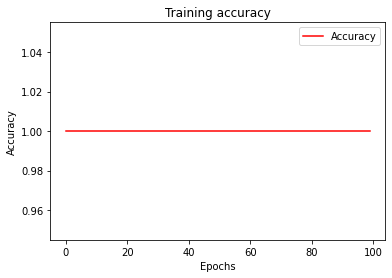

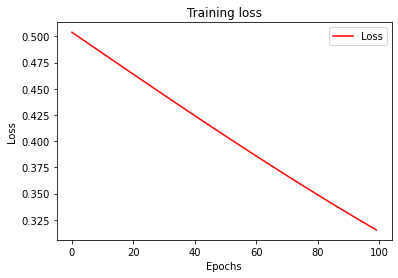

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

## Glove Embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-11-18 07:04:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-18 07:04:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-18 07:04:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
n=0
f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split() 
    word = word_vector[0] 
    print(word)
    print(word_vector) 
    n=n+1
    if n==2:
        break
f.close()

the
['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.3

In [ ]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
101


In [ ]:
import numpy as np
embedding_dict = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
#데이터 단어(word),임베딩(word_vector_arr,data type : float32)로 분리 -> embedding_dict딕셔너리로 저장
for line in f:
    
f.close()

In [ ]:
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))
print(embedding_dict['the'])
print(len(embedding_dict['the']))

400000개의 Embedding vector가 있습니다.
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.520

In [ ]:
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0

np.shape(embedding_matrix)

(16, 100)

In [ ]:
for word, i in t.word_index.items():
    temp = embedding_dict.get(word) 
    if temp is not None:
        embedding_matrix[i] = temp 

In [ ]:
print(t.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [ ]:
embedding_dict.get('nice')

array([-0.18554  ,  0.047152 ,  0.34867  , -0.23114  , -0.26083  ,
        0.63108  ,  0.55687  ,  0.61622  , -0.15437  , -0.38381  ,
        0.12445  , -0.26999  , -0.29196  ,  0.1125   ,  0.36035  ,
        0.70689  , -0.33891  , -0.2695   ,  0.17481  ,  0.97048  ,
        0.23014  ,  0.63168  , -0.24543  , -0.7289   ,  0.32517  ,
       -0.21118  , -0.80354  , -0.59863  , -0.10182  , -0.87826  ,
       -0.80162  ,  0.20999  ,  0.64598  , -0.38239  ,  0.64512  ,
        0.73046  , -0.19881  ,  0.35717  ,  0.19135  , -0.43686  ,
        0.75956  , -0.66431  ,  0.34509  , -1.0383   , -0.50491  ,
        0.19976  , -0.041208 ,  0.16952  ,  0.17821  , -0.84249  ,
        0.21992  , -0.16474  , -0.24669  ,  0.34117  , -0.59713  ,
       -2.3434   ,  0.31484  ,  0.69668  ,  0.53368  , -0.62857  ,
       -0.197    ,  0.52241  , -1.5903   , -0.16475  ,  0.62553  ,
       -0.094116 ,  0.0070705,  0.22617  , -0.45698  , -0.53268  ,
        0.11573  , -0.19052  ,  0.28086  , -0.5591   ,  0.3529

In [ ]:
embedding_matrix[1]

array([-0.18554001,  0.047152  ,  0.34867001, -0.23114   , -0.26082999,
        0.63107997,  0.55686998,  0.61622   , -0.15436999, -0.38381001,
        0.12445   , -0.26999   , -0.29196   ,  0.1125    ,  0.36035001,
        0.70688999, -0.33891001, -0.26949999,  0.17481001,  0.97048002,
        0.23014   ,  0.63168001, -0.24542999, -0.72890002,  0.32517001,
       -0.21118   , -0.80353999, -0.59863001, -0.10182   , -0.87826002,
       -0.80162001,  0.20998999,  0.64598   , -0.38238999,  0.64512002,
        0.73045999, -0.19881   ,  0.35716999,  0.19135   , -0.43686   ,
        0.75955999, -0.66430998,  0.34509   , -1.03830004, -0.50490999,
        0.19976   , -0.041208  ,  0.16952001,  0.17821001, -0.84249002,
        0.21991999, -0.16474   , -0.24669001,  0.34117001, -0.59713   ,
       -2.3434    ,  0.31483999,  0.69668001,  0.53368002, -0.62857002,
       -0.197     ,  0.52240998, -1.59029996, -0.16474999,  0.62553   ,
       -0.094116  ,  0.0070705 ,  0.22617   , -0.45697999, -0.53

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
#embedding층 정의
e=

In [ ]:
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7013 - acc: 0.5714
Epoch 2/100
1/1 - 0s - loss: 0.6792 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6581 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6377 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6182 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.5996 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.5817 - acc: 0.8571
Epoch 8/100
1/1 - 0s - loss: 0.5646 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.5482 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.5325 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.5176 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.5033 - acc: 1.0000
Epoch 13/100
1/1 - 0s - loss: 0.4896 - acc: 1.0000
Epoch 14/100
1/1 - 0s - loss: 0.4764 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.4639 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.4518 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4402 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4291 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4184 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4081 - a

<Figure size 432x288 with 0 Axes>

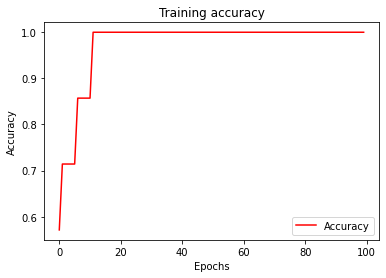

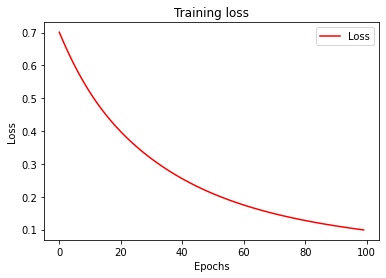

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

## Word2Vec Embedding

In [ ]:
import numpy as np
import gensim

In [ ]:
# 글의 사전 훈련된 Word2Vec을 다운로드
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-11-18 07:38:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.101.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.101.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.5MB/s    in 1m 40s  

2020-11-18 07:39:50 (15.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [ ]:
print(word2vec_model.vectors.shape)

(3000000, 300)


In [ ]:
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0
embedding_matrix = 
np.shape(embedding_matrix)

(16, 300)

In [ ]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [ ]:
test_word2vec=get_vector('nice')
test_word2vec

array([ 0.15820312,  0.10595703, -0.18945312,  0.38671875,  0.08349609,
       -0.26757812,  0.08349609,  0.11328125, -0.10400391,  0.17871094,
       -0.12353516, -0.22265625, -0.01806641, -0.25390625,  0.13183594,
        0.0859375 ,  0.16113281,  0.11083984, -0.11083984, -0.0859375 ,
        0.0267334 ,  0.34570312,  0.15136719, -0.00415039,  0.10498047,
        0.04907227, -0.06982422,  0.08642578,  0.03198242, -0.02844238,
       -0.15722656,  0.11865234,  0.36132812,  0.00173187,  0.05297852,
       -0.234375  ,  0.11767578,  0.08642578, -0.01123047,  0.25976562,
        0.28515625, -0.11669922,  0.38476562,  0.07275391,  0.01147461,
        0.03466797,  0.18164062, -0.03955078,  0.04199219,  0.01013184,
       -0.06054688,  0.09765625,  0.06689453,  0.14648438, -0.12011719,
        0.08447266, -0.06152344,  0.06347656,  0.3046875 , -0.35546875,
       -0.2890625 ,  0.19628906, -0.33203125, -0.07128906,  0.12792969,
        0.09619141, -0.12158203, -0.08691406, -0.12890625,  0.27

In [ ]:
for word, i in t.word_index.items(): 
    temp = get_vector(word) 
    if temp is not None: 
        embedding_matrix[i] = temp 

In [ ]:
print('단어 nice의 정수 인덱스 :', t.word_index['nice'])

단어 nice의 정수 인덱스 : 1


In [ ]:
print(embedding_matrix[1])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7388 - acc: 0.1429
Epoch 2/100
1/1 - 0s - loss: 0.7197 - acc: 0.2857
Epoch 3/100
1/1 - 0s - loss: 0.7011 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6831 - acc: 0.4286
Epoch 5/100
1/1 - 0s - loss: 0.6657 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6488 - acc: 0.5714
Epoch 7/100
1/1 - 0s - loss: 0.6324 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6166 - acc: 0.7143
Epoch 9/100
1/1 - 0s - loss: 0.6013 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.5865 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.5721 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.5583 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.5449 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.5319 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.5194 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.5073 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.4955 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.4842 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4732 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4625 - a

<Figure size 432x288 with 0 Axes>

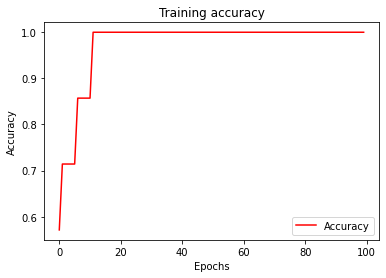

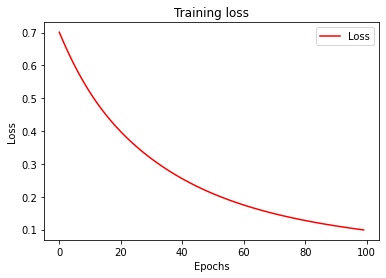

<Figure size 432x288 with 0 Axes>

In [ ]:
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()